In [5]:
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

from evo import EvolutionaryCommunityDetection

In [6]:
def read_communities(file_name: str, num_nodes: int) -> list:
    """
        Reads all the communities from a given file.
        
        :graph file_name: File where the communities reside.
        :graph num_nodes: Number of communities.
    """
    with open(file_name, "r") as f:
        lines = f.readlines()

    communities = [0] * num_nodes
    for community_index, line in enumerate(lines):
        nodes = list(map(int, line.split()))
        for node in nodes:
            communities[node - 1] = community_index + 1  # Assuming nodes are 1-indexed in the file.

    return communities

def read_communities_own(file_name: str, node_labels: list[str]) -> list:
    with open(file_name, "r") as f:
        lines = f.readlines()

    communities = {node: 0 for node in node_labels}
    for community_index, line in enumerate(lines):
        nodes = line.split()
        for node in nodes:
            if node in communities:
                communities[node] = community_index + 1  # Assuming nodes are labeled as strings in the file.

    return [communities[node] for node in node_labels]

In [7]:
def modularity(communities: list, graph: nx.Graph) -> float:
    """
        Computes the normalized modularity of a community graph.
        
        :param communities: List of communities.
        :param graph: Network graph represented as a NetworkX Graph.
    """
    
    # Number of nodes in the graph.
    noNodes = graph.number_of_nodes()
    
    # Adjacency matrix of the graph.
    mat = nx.to_numpy_array(graph)
    
    # Degrees of each node of the graph
    degrees = [val for (node, val) in graph.degree()]
    
    # Number of edges in the graph.
    noEdges = graph.number_of_edges()
    
    # Sum of node degrees.
    M = 2 * noEdges
    
    # Modularity.
    Q = 0.0
    
    # Passing the graph as pairs of nodes.
    for i in range(noNodes):
        for j in range(noNodes):
            # Checking if the nodes are part of the same community.
            if communities[i] == communities[j]:
                # Modularity formula.
                # A greater modularity shows that the network is separated in dense communities, showing that
                # the modular structure is well defined.
                Q += (mat[i][j] - degrees[i] * degrees[j] / M)  
                
    # Normalized modularity (with respect to the sum of degrees).
    return Q * 1 / M

def network_classification_library(file: str, gmlFile: str, realFile: str) -> None:
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'real-networks', file, gmlFile)
    network = nx.read_gml(filePath)

    # Visualizing the network.
    warnings.simplefilter('ignore')
    
    # Computing the graph layout.
    pos = nx.spring_layout(network)
    
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_nodes(network, pos, node_size=100, cmap=plt.cm.RdYlBu)
    nx.draw_networkx_edges(network, pos, alpha=0.5)
    plt.show()

    # Reading the real communities.
    communities_file = os.path.join(crtDir, 'real-networks', file, realFile)
    communities = read_communities(communities_file, network.number_of_nodes())

    # Plot the network with community divisions.
    #pos = nx.spring_layout(network)
    
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_nodes(network, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=communities)
    nx.draw_networkx_edges(network, pos, alpha=0.5)
    plt.show()

    # Evaluation of the division.
    print("The community division eval for ", file, modularity(communities, network))
    
def network_classification_own(model: EvolutionaryCommunityDetection, file: str, gmlFile: str, realFile: str) -> None:
    crtDir = os.getcwd()
    filePath = os.path.join(crtDir, 'real-networks', file, gmlFile)
    network = nx.read_gml(filePath)

    # Visualizing the network.
    warnings.simplefilter('ignore')
    
    # Computes graph layout.
    pos = nx.spring_layout(network)
    
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_nodes(network, pos, node_size=100, cmap=plt.cm.RdYlBu)
    nx.draw_networkx_edges(network, pos, alpha=0.5)
    plt.show()
    
    # pop_size -> no. solution
    # generations -> no. iterations
    # mutation_rate -> limit of searching the local best.
    model.network = network
    best_solution = model.run()

    # Converting each node to a color based on its community.
    community_mapping = {node: 0 for node in network.nodes()}
    for community_index, community in enumerate(best_solution):
        for node in community:
            community_mapping[node] = community_index
    community_values = [community_mapping[node] for node in network.nodes()]
    
    # Visualizing the network.
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_nodes(network, pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=community_values)
    nx.draw_networkx_edges(network, pos, alpha=0.5)
    plt.show()

    # Reading the true communities from the file.
    communities_file = os.path.join(crtDir, 'real-networks', file, realFile)
    real_communities = read_communities_own(communities_file, list(network.nodes()))

    # Evaluation of the community division.
    print("The community division evaluation for", file, modularity(real_communities, network))

Library - alphabet


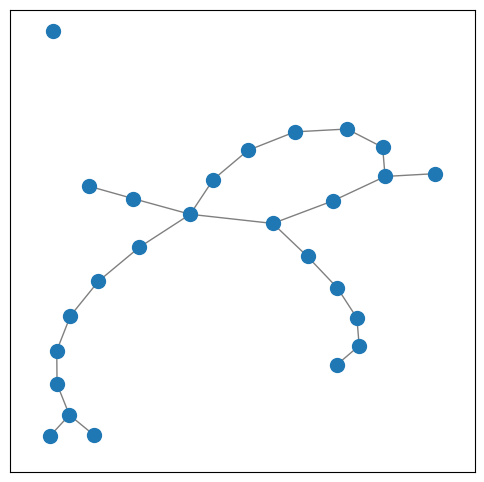

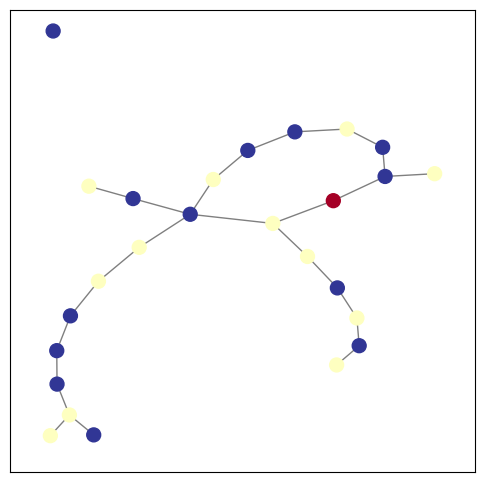

The community division eval for  own/alphabet -0.14560000000000003

Own - alphabet


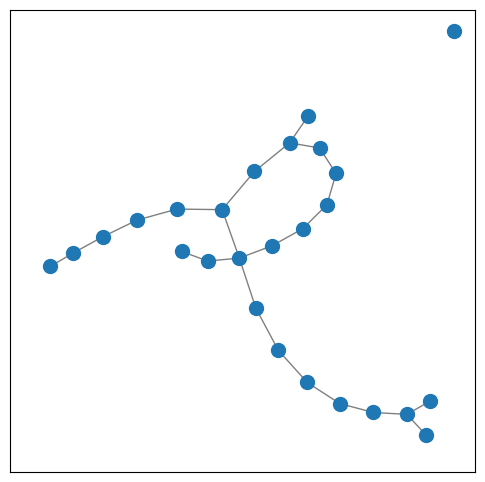

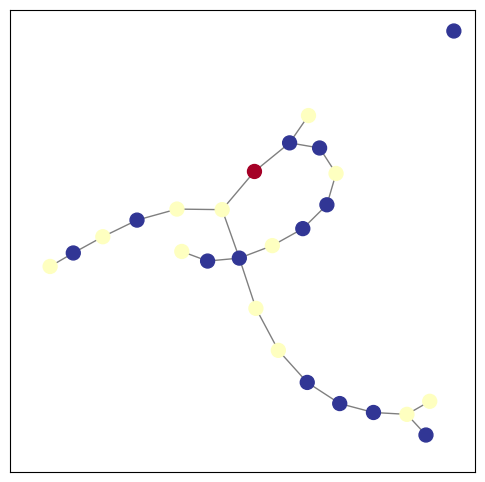

The community division eval for  own/alphabet -0.14560000000000003



In [8]:
model = EvolutionaryCommunityDetection(None, pop_size=20, generations=100, mutation_rate=0.01)

# print("Library - movies")
# network_classification_library('own/movies', 'starwars_network.gml', 'real.dat')
# print()

# print("Own - movies")
# network_classification_own(model, 'own/movies', 'starwars_network.gml', 'real.dat')
# print()

# print("Library - football")
# network_classification_library('real/football', 'football.gml', 'real.dat')
# print()

# print("Own - football")
# network_classification_library('real/football', 'football.gml', 'real.dat')
# print()

print("Library - alphabet")
network_classification_library('own/alphabet', 'alphabet.gml', 'real.dat')
print()

print("Own - alphabet")
network_classification_library('own/alphabet', 'alphabet.gml', 'real.dat')
print()